Using selected questions from the 2012 and 2014 editions of the European Social Survey, figure out which test to use for the following questions:

Data Source: https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv

Data Info: https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")
data.head(5)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
data["cntry"].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [7]:
data["year"].unique()

array([6, 7])

In [8]:
data["cntry"] = pd.factorize(data["cntry"])[0]
data["cntry"].unique()

array([0, 1, 2, 3, 4, 5])

In [9]:
data.shape

(8594, 13)

In [10]:
data.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [11]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [12]:
data.dtypes

cntry        int64
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [13]:
CH_2012 = data[(data["cntry"] == 0) & (data["year"] == 6)]
CZ_2012 = data[(data["cntry"] == 1) & (data["year"] == 6)]
DE_2012 = data[(data["cntry"] == 2) & (data["year"] == 6)]
ES_2012 = data[(data["cntry"] == 3) & (data["year"] == 6)]
NO_2012 = data[(data["cntry"] == 4) & (data["year"] == 6)]
SE_2012 = data[(data["cntry"] == 5) & (data["year"] == 6)]

In [14]:
CH_2014 = data[(data["cntry"] == 0) & (data["year"] == 7)]
CZ_2014 = data[(data["cntry"] == 1) & (data["year"] == 7)]
DE_2014 = data[(data["cntry"] == 2) & (data["year"] == 7)]
ES_2014 = data[(data["cntry"] == 3) & (data["year"] == 7)]
NO_2014 = data[(data["cntry"] == 4) & (data["year"] == 7)]
SE_2014 = data[(data["cntry"] == 5) & (data["year"] == 7)]

In [15]:
df_list_2012 = [CH_2012,CZ_2012,DE_2012,ES_2012,NO_2012,SE_2012]
df_list_2014 = [CH_2014,CZ_2014,DE_2014,ES_2014,NO_2014,SE_2014]

In [71]:
def vis_hist(df_list,col_val):
    plt.rcParams["figure.figsize"] = (23,13)
    fig,ax = plt.subplots(nrows=2,ncols=3)
    i = 0
    j = 0
    cntry_list = ["CH","CZ","DE","ES","NO","SE"]
    for df,cntry in zip(df_list,cntry_list):
        ax[i,j].hist(df[col_val],bins=10)
        
        if 6 in df["year"].values:
            ax[i,j].set_title(cntry + " People's Trust 2012 Distribution")
        if 7 in df["year"].values:
            ax[i,j].set_title(cntry + " People's Trust 2014 Distribution")
        
        if j == 2:
            i += 1
            j = 0
        else:
            j += 1
    fig.tight_layout()
    plt.show()

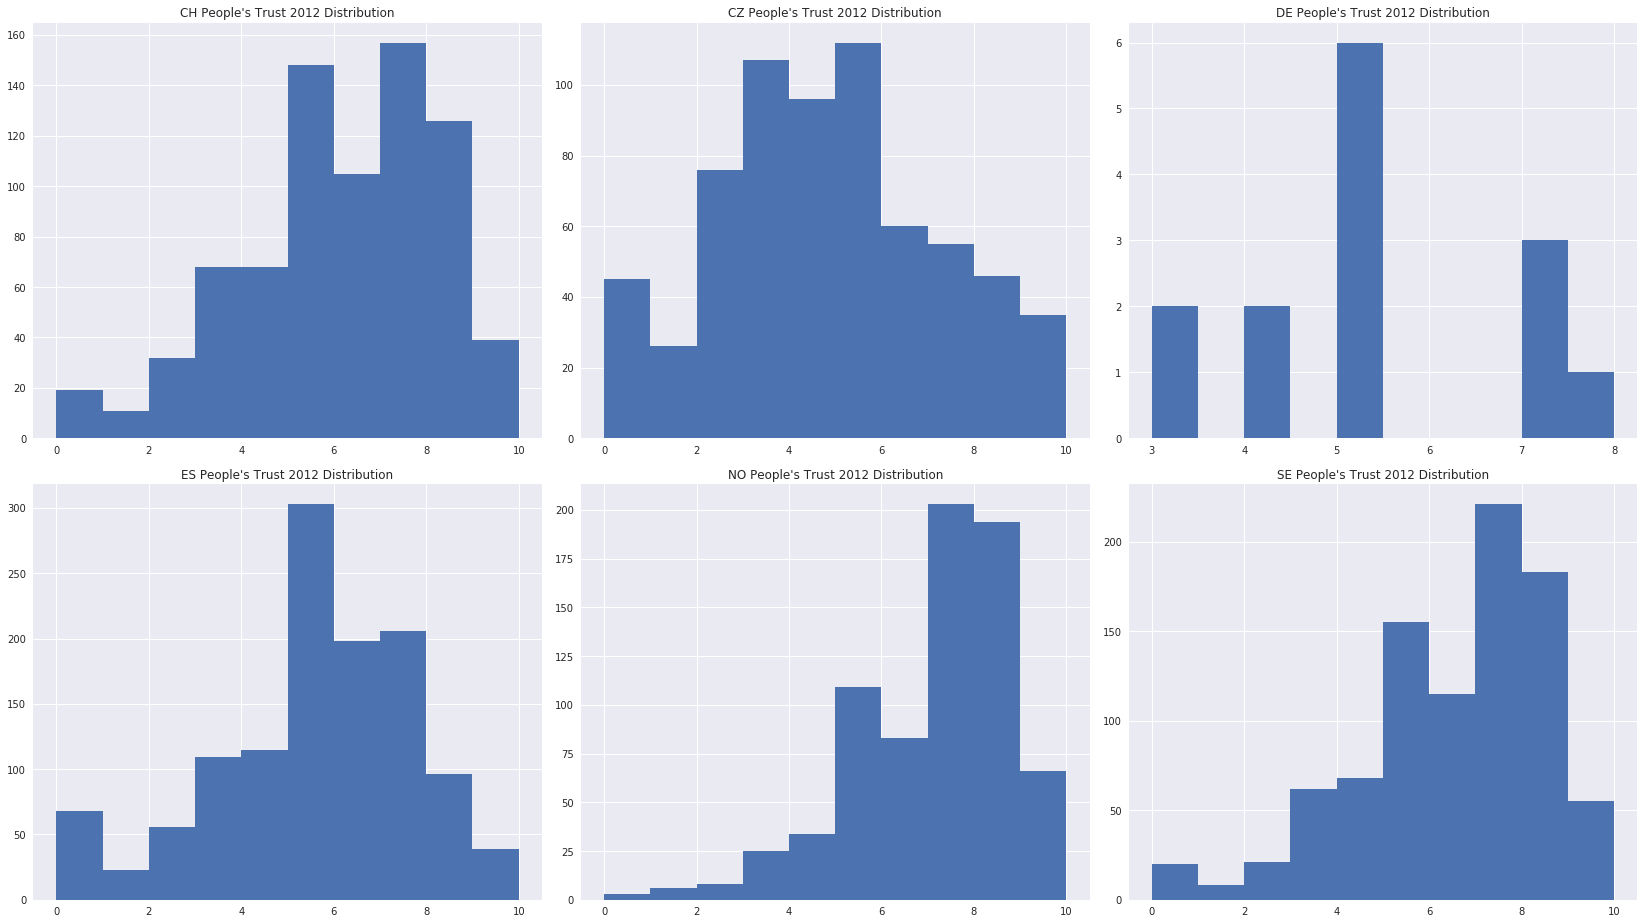

In [72]:
vis_hist(df_list_2012,"ppltrst")

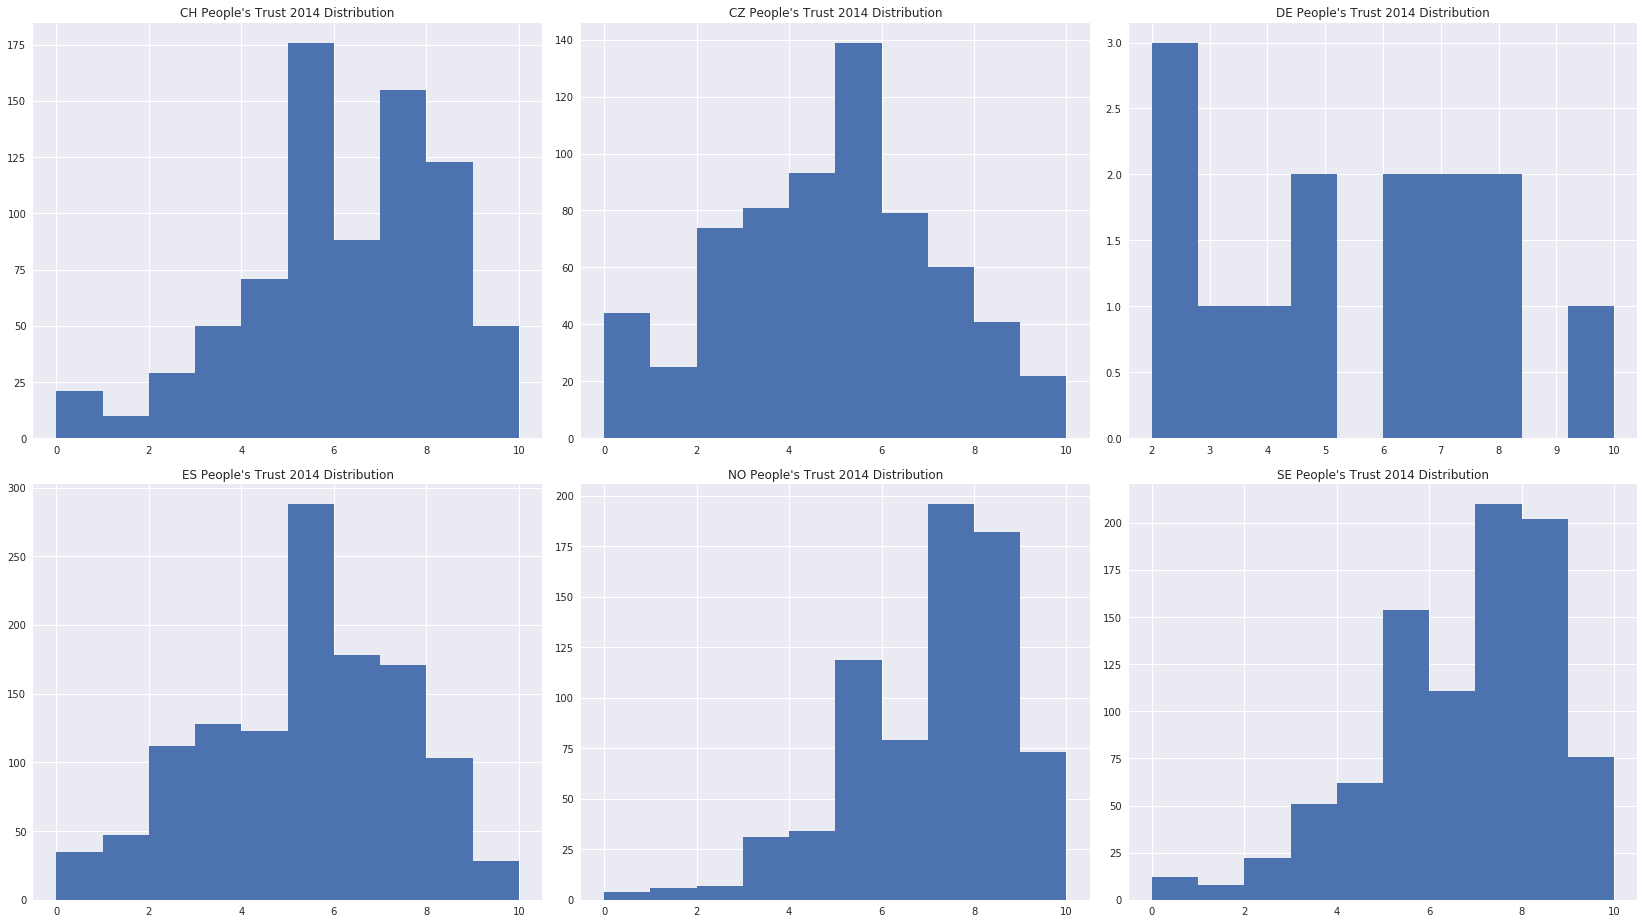

In [73]:
vis_hist(df_list_2014,"ppltrst")

2012 - 2014

CH: 773 rows,
CZ: 658 rows,
DE: 14 rows,
ES: 1213 rows,
NO: 731 rows,
SE: 908 rows,

In [19]:
# non-parametric test (A: 2012 ppltrst (control), B: 2014 ppltrst (experimental))
import scipy.stats as stats

cntry_list = ["CH","CZ","DE","ES","NO","SE"]

for cntry,df_2012,df_2014 in zip (cntry_list,df_list_2012,df_list_2014):
    print(cntry + ": ",stats.kruskal(df_2012["ppltrst"],df_2014["ppltrst"]))

CH:  KruskalResult(statistic=0.3016359964448019, pvalue=0.5828586111442048)
CZ:  KruskalResult(statistic=0.5340306520300221, pvalue=0.4649172016371461)
DE:  KruskalResult(statistic=0.03493591039585809, pvalue=0.8517300191250199)
ES:  KruskalResult(statistic=8.149961651374431, pvalue=0.004306207168095373)
NO:  KruskalResult(statistic=0.24569560721491657, pvalue=0.620122374635789)
SE:  KruskalResult(statistic=4.335895080514051, pvalue=0.037316790239688535)


In [20]:
# close to normal distributions, lets try parametric test 
for cntry,df_2012,df_2014 in zip (cntry_list,df_list_2012,df_list_2014):
    print(cntry + ": ",stats.ttest_ind(df_2012["ppltrst"],df_2014["ppltrst"]))

CH:  Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
CZ:  Ttest_indResult(statistic=-0.39418543261711414, pvalue=0.6935081020969057)
DE:  Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
ES:  Ttest_indResult(statistic=2.4837720623641446, pvalue=0.013067001200379165)
NO:  Ttest_indResult(statistic=0.5436344941028719, pvalue=0.5867760147589384)
SE:  Ttest_indResult(statistic=-2.1029309554508333, pvalue=0.03560925311628811)


It appears that for both parametric and non-parametric tests, any difference between people's trust between 2012 and 2014 in each country, besides ES & SE, will not be significant. We initially chose non-parametric because the distributions appeared to be non-normally distributed. On the other hand, we could interpret most of the histograms to being "close" to normal distributions and therefore justify the use of parametric tests to try and get more information about the difference between people's trust between 2012 and 2014. 

In most of the countries, it appears that people's trust did not significantly change between 2012 and 2014 because the t-statistic seemed to be consistently close to 0 in every case. The two countries that had the most significant change were ES and SE.

Furthermore, due to the method in which we wplit the data, we decided to do an A/B test and not an A/B/C...test. This shouldn't cause any significant change in our test outcomes, but it should be stated that we did an A/B test when we could've also done an A/B/C... test.

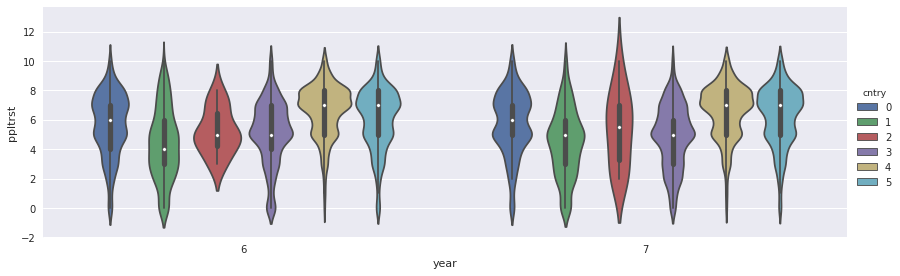

In [62]:
import seaborn as sns

sns.factorplot(x = "year", y = "ppltrst", hue = "cntry", data = data, kind = "violin",aspect=30/10)
plt.show()

Used a violin plot to show another way to compare distributions of "ppltrst" between 2012 and 2014. The distributions appear relatively consistent between the two different years.

In [84]:
def change_over_time(df_2012,df_2014,col_val,plot_title):
    plt.rcParams["figure.figsize"] = (23,13)
    fig,ax = plt.subplots(nrows=2,ncols=3)
    i = 0
    j = 0
    cntry_list = ["CH","CZ","DE","ES","NO","SE"]
    year = [2012,2014]
    for df1,df2,cntry in zip(df_2012,df_2014,cntry_list):
        ppl_list = []
        ppl_list.append(df1[col_val].mean())
        ppl_list.append(df2[col_val].mean())
        ax[i,j].plot(year,ppl_list)
        ax[i,j].set_title(cntry + " People's Avg. {} 2012-2014".format(plot_title))
        if j == 2:
            i += 1
            j = 0
        else:
            j += 1
    fig.tight_layout()
    plt.show()

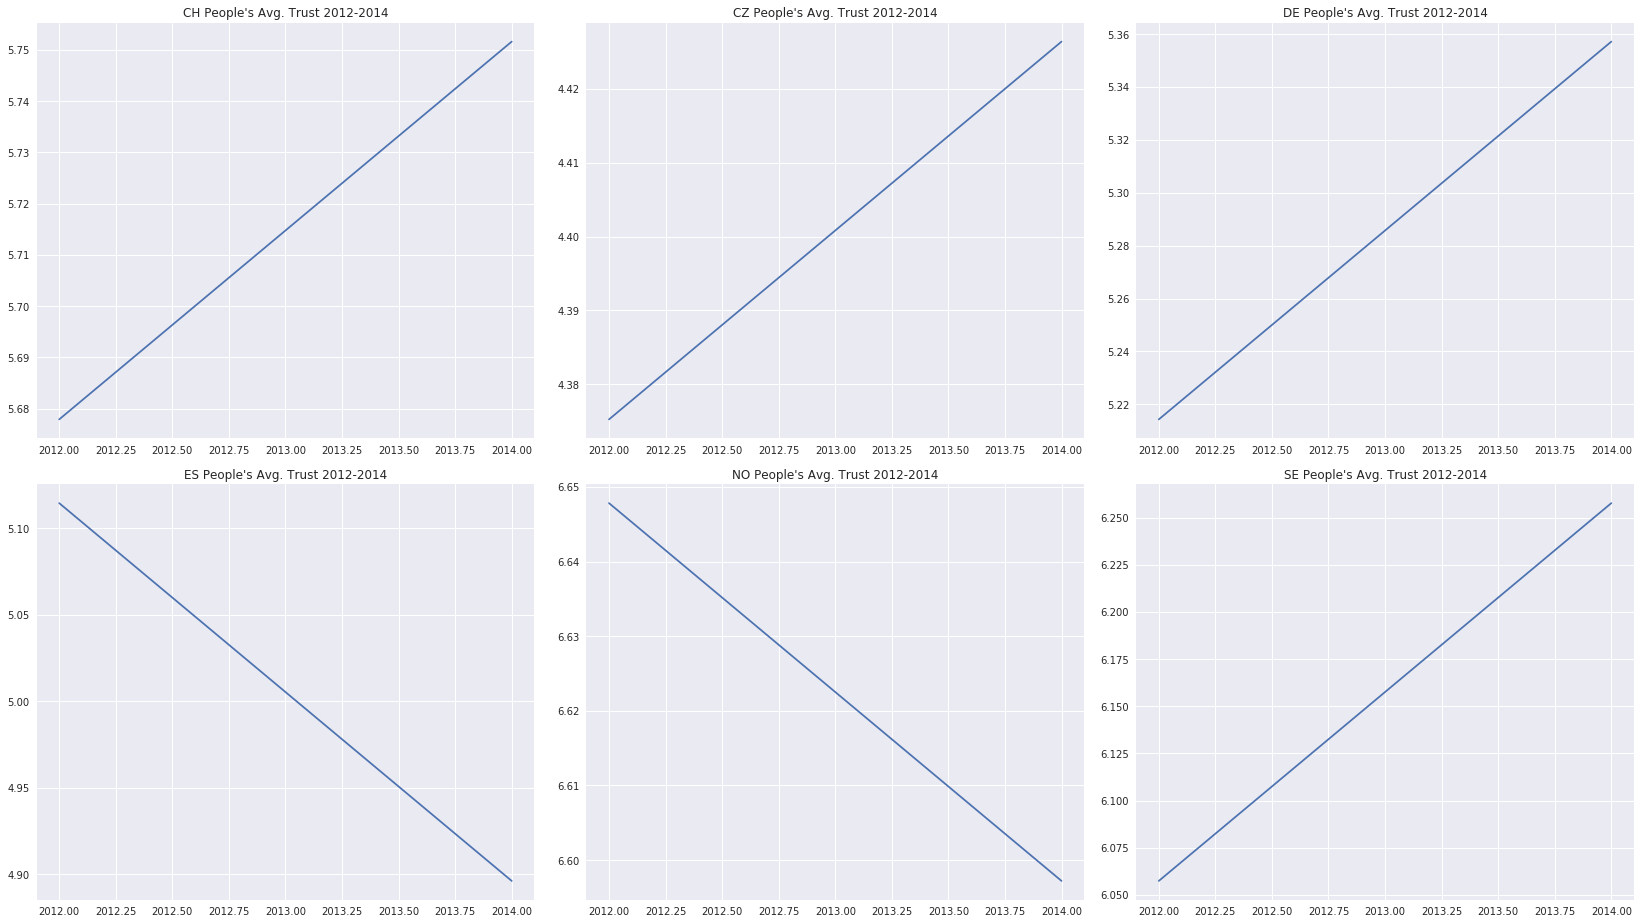

In [85]:
change_over_time(df_list_2012,df_list_2014,"ppltrst","Trust")

The line plots are comparing the average "ppltrst" over time in years. The plots suggest that in certain countries, the average trust in members of their population increased from 2012 to 2014. However, it also appears that average trust decreased in other countries. 

The t-test tells us that only two of the countries, ES and SE, have differences that we can be relatively certain are not the result of random chance, and are therefore significant. According to the line plots, average trust decreased in ES and increased in SE from 2012 to 2014.

We have not looked at outliers in the data which could cause potential misrepresentation in our visuals. For example, in ES, the avgerage people's trust was rated at about 5.40 in 2012 and that decreased to about 4.90 in 2014. There could be an outlier in either 2012 or 2014 that could be affecting the average trust rating by making the rating appear larger than it actually is. In future cases, it would be prudent to remove outliers before drawing definitive conclusions.

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

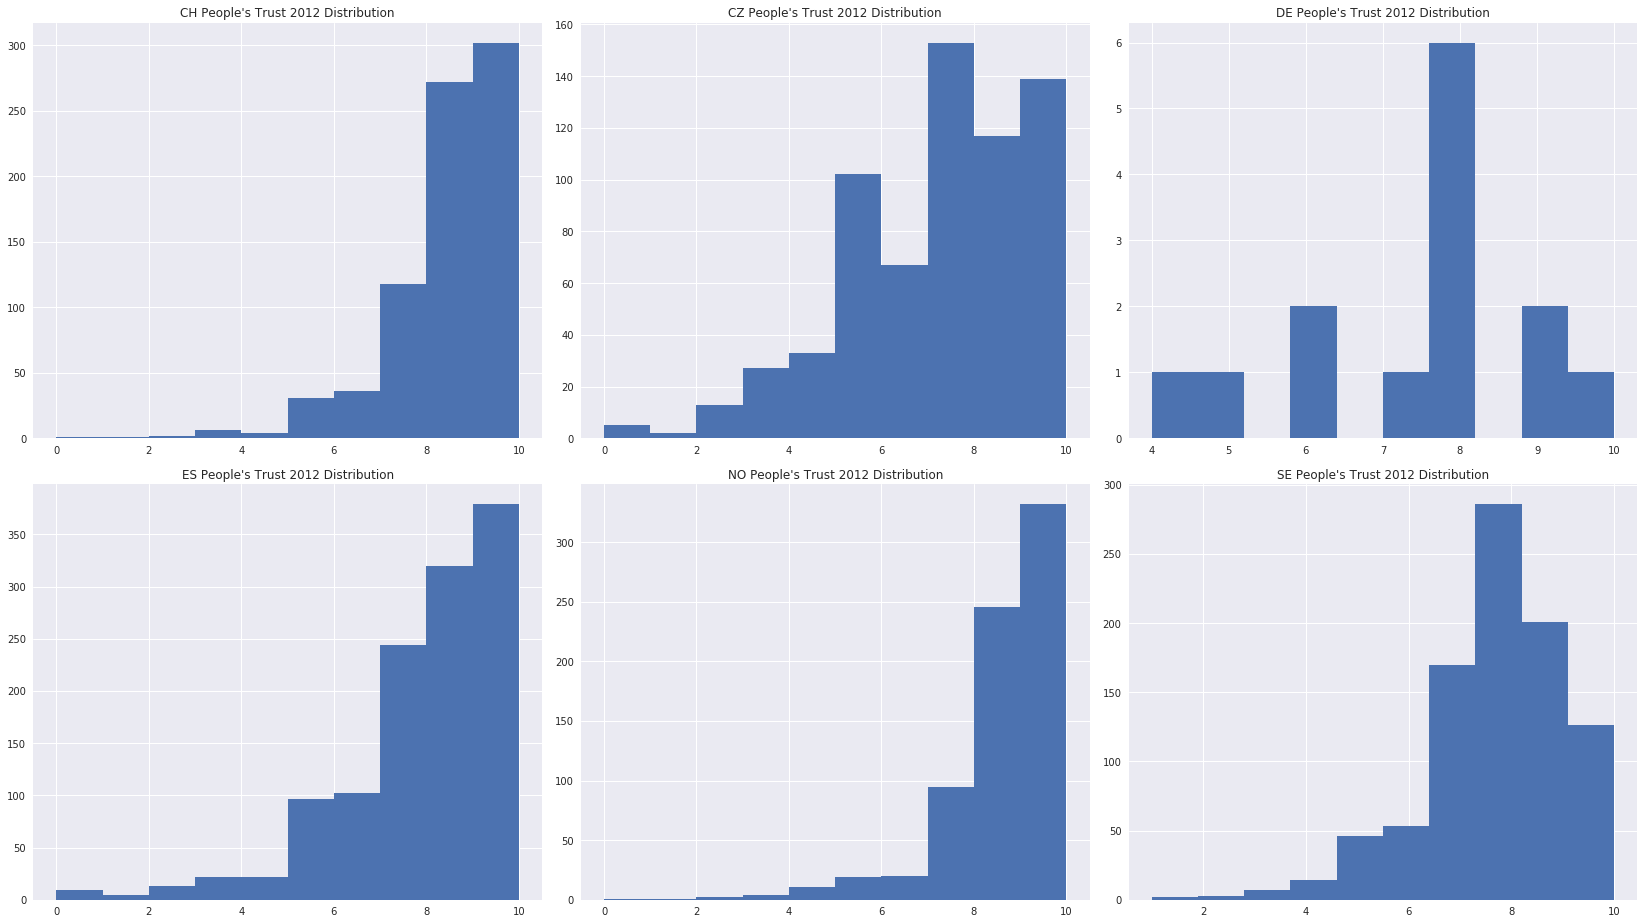

In [74]:
vis_hist(df_list_2012,"happy")

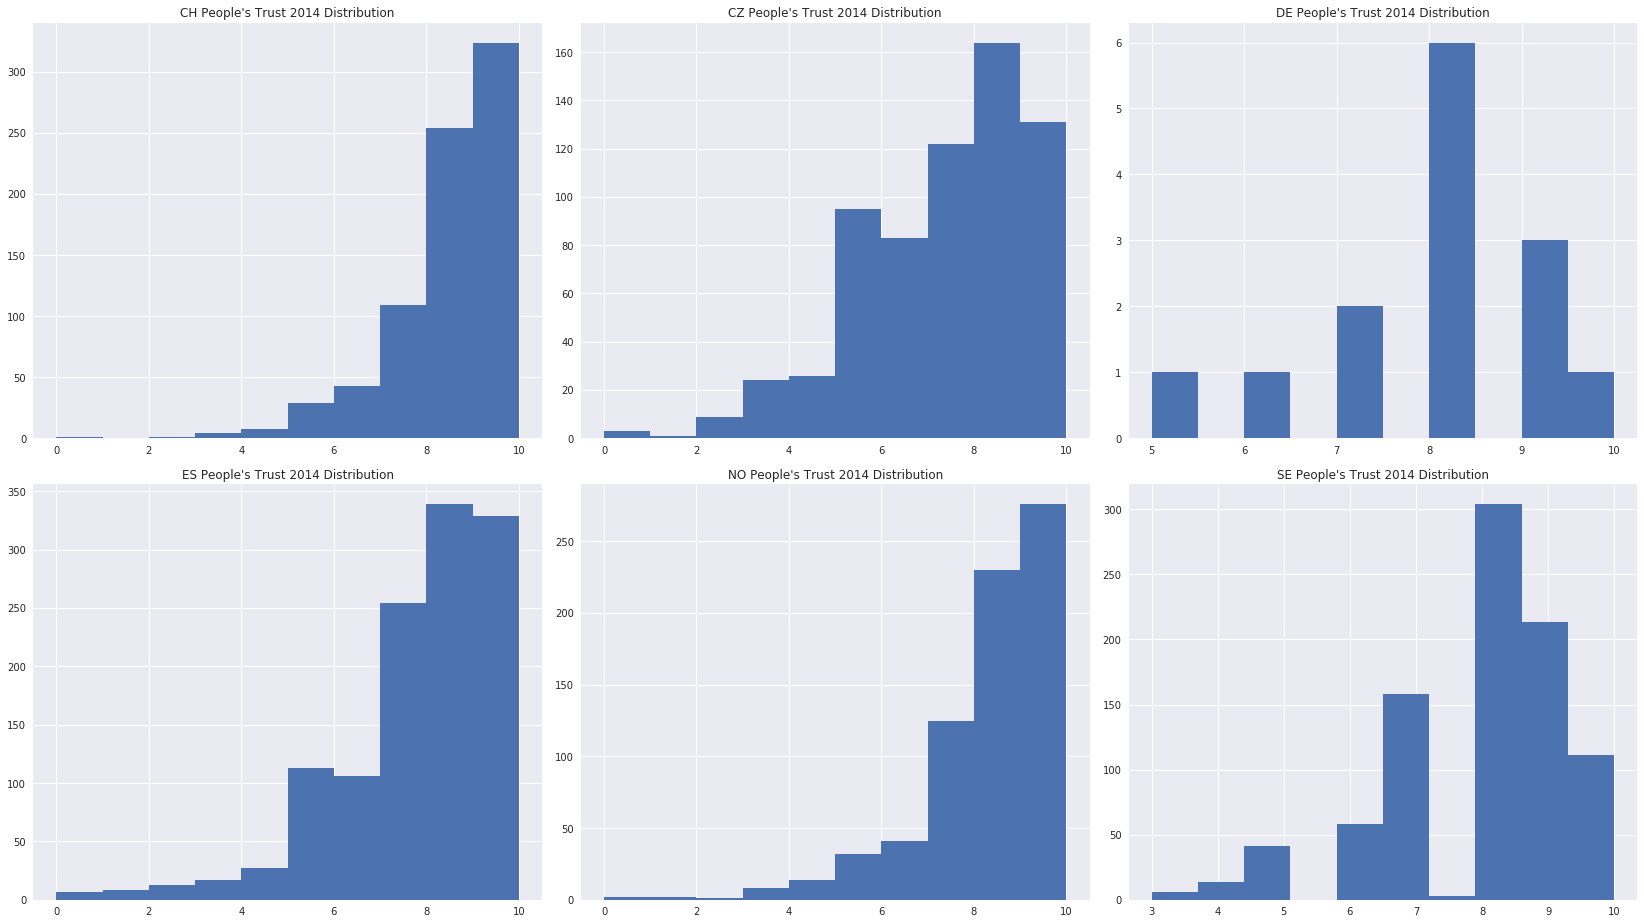

In [75]:
vis_hist(df_list_2014,"happy")

The data distribution appears to be non-normally distributed. Will use non-parametric test for comparing 2012 and 2014 happiness levels.

In [76]:
for cntry,df_2012,df_2014 in zip (cntry_list,df_list_2012,df_list_2014):
    print(cntry + ": ",stats.kruskal(df_2012["happy"],df_2014["happy"]))

CH:  KruskalResult(statistic=0.290200214764067, pvalue=0.5900922565247079)
CZ:  KruskalResult(statistic=1.37693130979392, pvalue=0.24062454923524212)
DE:  KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)
ES:  KruskalResult(statistic=4.086118020109992, pvalue=0.043236838117116295)
NO:  KruskalResult(statistic=18.352664983589847, pvalue=1.8356204614283526e-05)
SE:  KruskalResult(statistic=0.038506386752578475, pvalue=0.8444298011877086)


It appears that countries ES and NO have the most significant difference in citizens' reported happiness between 2012 to 2014.

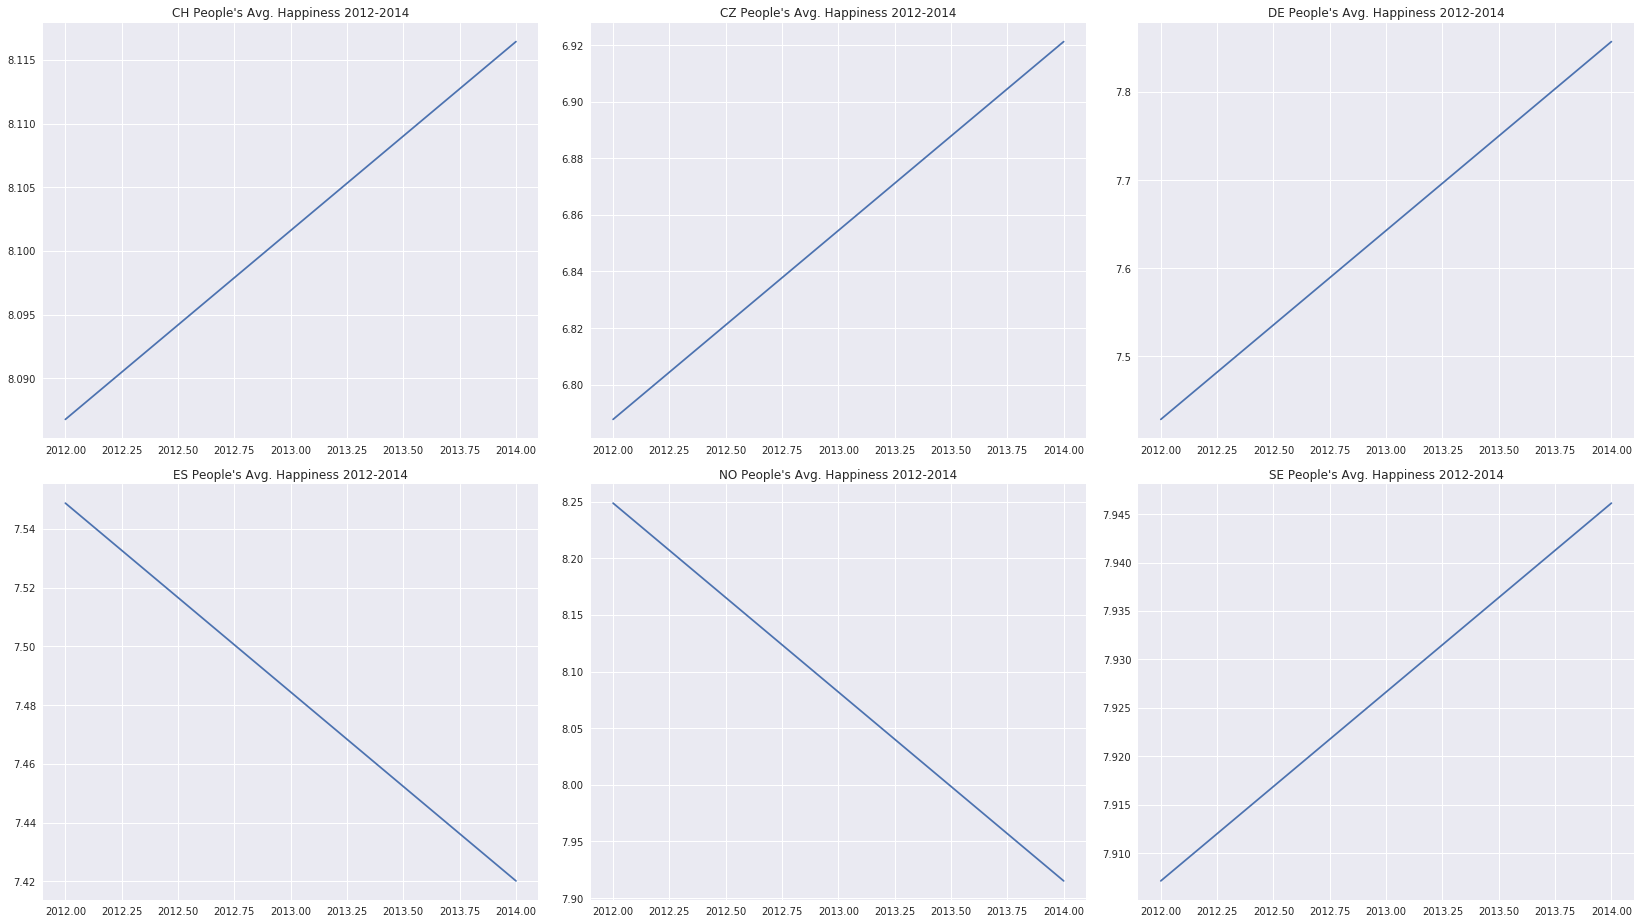

In [86]:
change_over_time(df_list_2012,df_list_2014,"happy","Happiness")

For country ES and NO, average happiness levels decreased. The results could be affected by potential outliers, reasons stated in previous analysis of changes in peoples' trust per country. Cannot make further inferences in other countries because we cannot be certain that the difference is significant in those countries or the difference is the result of random chance.

### Who reported watching more TV in 2012, men or women?

In [117]:
df_tv_2012_m = data.loc[(data["gndr"] == 1.0) & (data["year"]==6), "tvtot"] 
df_tv_2012_f = data.loc[(data["gndr"] == 2.0) & (data["year"] == 6), "tvtot"]

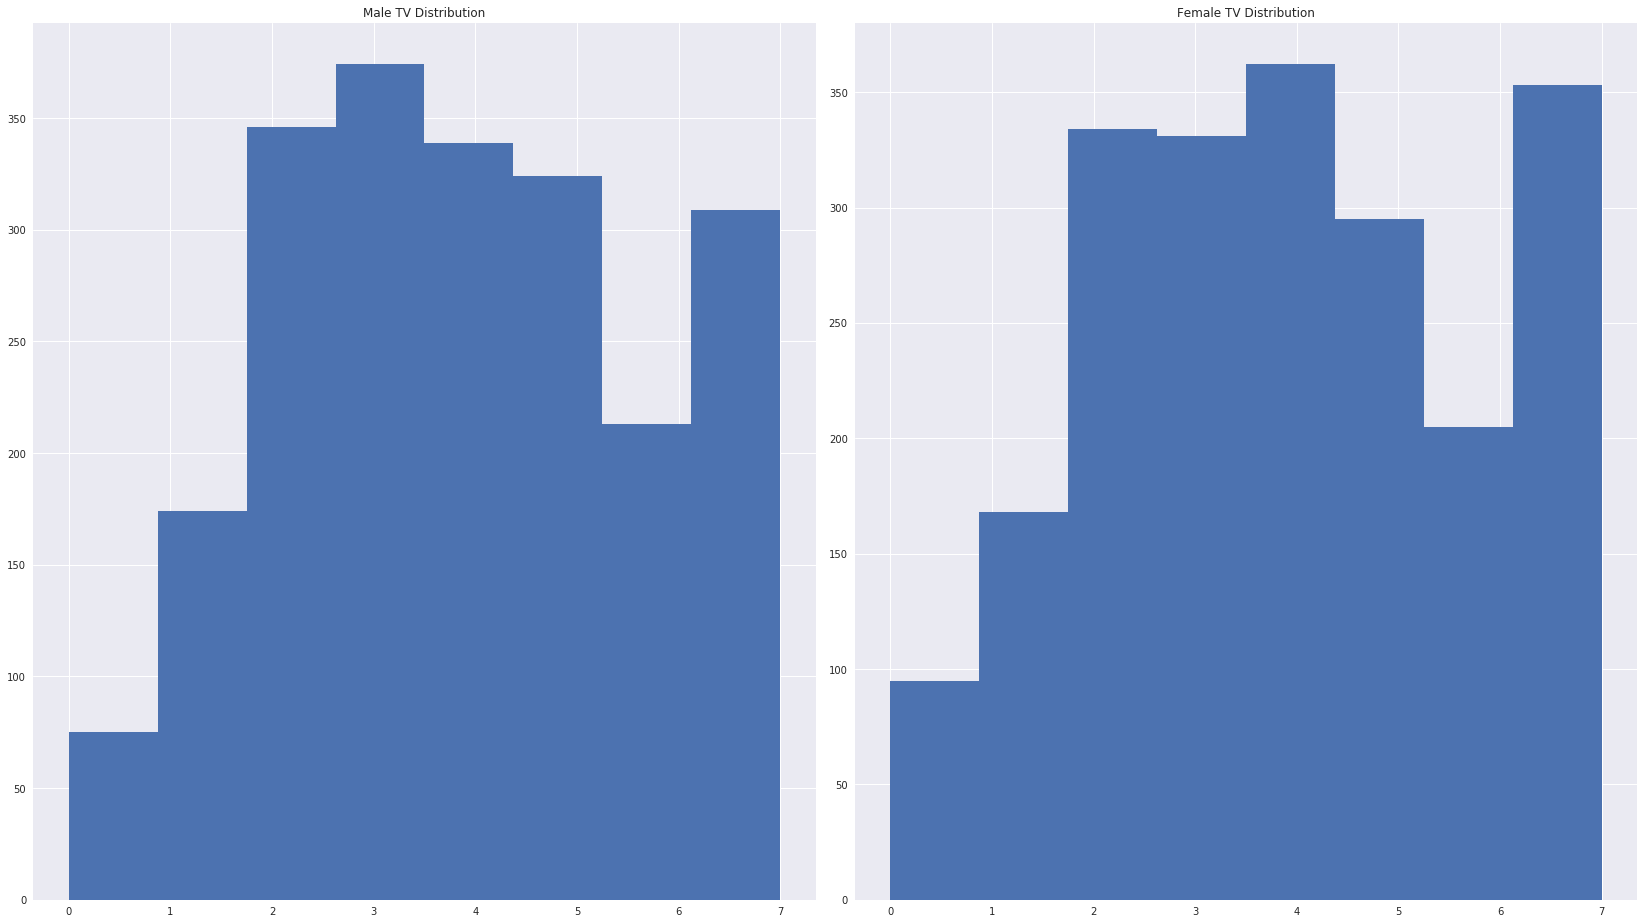

In [129]:
fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].hist(df_tv_2012_m,bins=8)
ax[0].set_title("Male TV Distribution")
ax[1].hist(df_tv_2012_f,bins=8)
ax[1].set_title("Female TV Distribution")

fig.tight_layout()
plt.show()

The data is not too skewed to suggest the need for non-parametric testing. We can try using t-tests.

In [131]:
stats.ttest_ind(df_tv_2012_m,df_tv_2012_f)

Ttest_indResult(statistic=-0.6899854275080107, pvalue=0.49024063084629854)

In [132]:
stats.kruskal(df_tv_2012_m,df_tv_2012_f)

KruskalResult(statistic=0.5781642893743878, pvalue=0.4470327617567298)

Tried both parametric and non-parametric because while the distribution appeared close to normal distribution, it also appears to have some non-normality. Furthermore, it appeared that the t-test found that the difference between male and female tv watching periods were not significantly different. Therefore, we tried using non-parametric test to see if we could get a different result, but we ended up getting a similar outcome

In summary, we cannot draw definitive conclusion that there is a difference between male and female TV watching periods in 2012 that is not the result of random chance. 

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?